In [218]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler

# Load data into a pandas DataFrame
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [219]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

X = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


Text(0.5, 257.44, 'Predicted Stroke Result')

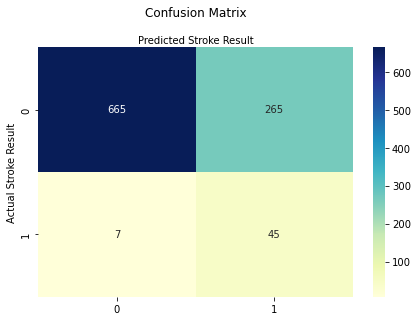

In [220]:
# Define the features and target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

undersampler = RandomUnderSampler()

# Fit the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train a logistic regression model on the undersampled data
model = LogisticRegression(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Stroke Result')
plt.xlabel('Predicted Stroke Result')

In [221]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.7230142566191446
F1 Score: 0.24861878453038672
Precision: 0.14516129032258066
Recall: 0.8653846153846154
Confusion matrix:
[[665 265]
 [  7  45]]
